In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import cv2

In [42]:
data = []

classes = 43
IMG_SIZE = 30


train_path = r"D:\Python projects\Machine Learning\Traffic Sign Detection\dataset\Train"


for i in range(classes):
    path = os.path.join(train_path, str(i))
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            data.append([new_array, i])
        except:
            pass


In [43]:
len(data)

39209

In [44]:
data[-1][1]

42

In [45]:
import random

random.shuffle(data)

In [46]:
img_datas = []
labels = []

for i in data:
    img_datas.append(i[0])
    labels.append(i[1])

In [47]:
labels[:5]

[40, 41, 1, 25, 2]

In [48]:
img_datas = np.array(img_datas)
labels = np.array(labels)

In [49]:
labels[:5]

array([40, 41,  1, 25,  2])

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(img_datas, labels)

In [51]:
X_train.shape, X_test.shape

((29406, 30, 30, 3), (9803, 30, 30, 3))

In [52]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [54]:
## Building Model

In [55]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(43, activation='softmax'))

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
cnn = model.fit(X_train,y_train, batch_size=32, epochs=15, validation_data=(X_test,y_test))

Epoch 1/15
919/919 [==============================] - 45s 49ms/step - loss: 1.6915 - accuracy: 0.5758 - val_loss: 0.3675 - val_accuracy: 0.9126
Epoch 2/15
919/919 [==============================] - 47s 51ms/step - loss: 0.4903 - accuracy: 0.8597 - val_loss: 0.1559 - val_accuracy: 0.9594
Epoch 3/15
919/919 [==============================] - 48s 52ms/step - loss: 0.3136 - accuracy: 0.9117 - val_loss: 0.1032 - val_accuracy: 0.9718
Epoch 4/15
919/919 [==============================] - 46s 50ms/step - loss: 0.2396 - accuracy: 0.9301 - val_loss: 0.1016 - val_accuracy: 0.9766
Epoch 5/15
919/919 [==============================] - 45s 49ms/step - loss: 0.2498 - accuracy: 0.9294 - val_loss: 0.0859 - val_accuracy: 0.9749
Epoch 6/15
919/919 [==============================] - 45s 49ms/step - loss: 0.2196 - accuracy: 0.9381 - val_loss: 0.0574 - val_accuracy: 0.9834
Epoch 7/15
919/919 [==============================] - 45s 49ms/step - loss: 0.1896 - accuracy: 0.9481 - val_loss: 0.0526 - val_accuracy:

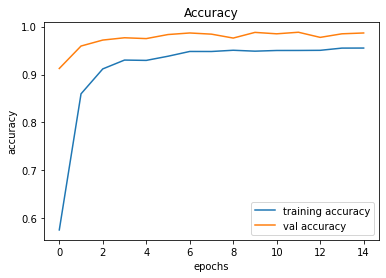

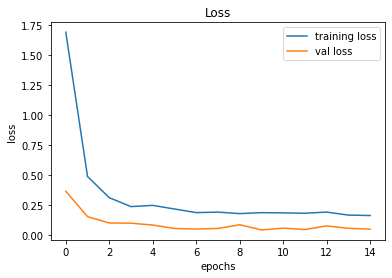

In [70]:
plt.figure(0)
plt.plot(cnn.history['accuracy'], label='training accuracy')
plt.plot(cnn.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(cnn.history['loss'], label='training loss')
plt.plot(cnn.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [71]:
##Testing accuracy on test dataset

In [72]:
from sklearn.metrics import accuracy_score

In [90]:
test = pd.read_csv('Test.csv')

In [91]:
test.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [92]:
test_labels = test["ClassId"].values
test_labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [93]:
img_paths = test["Path"].values
img_paths

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype=object)

In [98]:
test_images_path = r"D:\Python projects\Machine Learning\Traffic Sign Detection\dataset\Test"
test_data = []

for img in os.listdir(test_images_path):
        try:
            img_array = cv2.imread(os.path.join(test_images_path, img))
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            test_data.append(new_array)
        except:
            print("Not found", img)

Not found GT-final_test.csv


In [99]:
len(test_data)

12630